In [1]:
#importing modules
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import save_model

#import training data
training_data= pd.read_csv("/content/chatbotDnn.txt", delimiter='|')

# Fill in any empty values in the first column with the default value "None"
training_data['patterns'] = training_data['patterns'].fillna('None')

In [3]:
#preprocessing training data
#converts text to lowercase
training_data['patterns']= training_data['patterns'].str.lower()
#creates an instance of tfidvectorizer class and specifies that the vectorizer should consider unigrams (individual words) and bigrams (pairs of consecutive words)
vectorizer= TfidfVectorizer(ngram_range=(1,2), stop_words="english")
training_data_tfidf= vectorizer.fit_transform(training_data['patterns']).toarray()

In [4]:
#preprocessing target variable(tags)
le= LabelEncoder()
training_data_tags_le= pd.DataFrame({"tags": le.fit_transform(training_data["tags"])})
#This line one-hot encodes the categorical labels in the 'tags' column.
training_data_tags_dummy_encoded= pd.get_dummies(training_data_tags_le["tags"]).to_numpy()

In [5]:
from pandas.core.dtypes.generic import ABCTimedeltaArray
#creating DNN
hospbot= Sequential()
#These lines add layers to the sequential model.
hospbot.add(Dense(10, input_shape=(len(training_data_tfidf[0]),)))
hospbot.add(Dense(8))
hospbot.add(Dense(8))
hospbot.add(Dense(6))
#This line adds the output layer.
hospbot.add(Dense(len(training_data_tags_dummy_encoded[0]), activation="softmax"))
hospbot.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [6]:
#fitting DNN
hospbot.fit(training_data_tfidf, training_data_tags_dummy_encoded, epochs=50, batch_size=32)
#saving model file
save_model(hospbot, "HospBot")

Epoch 1/50
2/2 [==============================] - 1s 17ms/step - loss: 3.1527 - accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 9ms/step - loss: 3.1327 - accuracy: 0.0192
Epoch 3/50
2/2 [==============================] - 0s 9ms/step - loss: 3.1193 - accuracy: 0.0192
Epoch 4/50
2/2 [==============================] - 0s 10ms/step - loss: 3.1080 - accuracy: 0.0192
Epoch 5/50
2/2 [==============================] - 0s 8ms/step - loss: 3.0987 - accuracy: 0.0192
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: 3.0888 - accuracy: 0.0385
Epoch 7/50
2/2 [==============================] - 0s 8ms/step - loss: 3.0794 - accuracy: 0.0577
Epoch 8/50
2/2 [==============================] - 0s 8ms/step - loss: 3.0698 - accuracy: 0.0962
Epoch 9/50
2/2 [==============================] - 0s 9ms/step - loss: 3.0601 - accuracy: 0.0962
Epoch 10/50
2/2 [==============================] - 0s 8ms/step - loss: 3.0501 - accuracy: 0.1346
Epoch 11/50
2/2 [================

Epoch 1/50
2/2 [==============================] - 0s 11ms/step - loss: 2.5226 - accuracy: 0.2692
Epoch 2/50
2/2 [==============================] - 0s 8ms/step - loss: 2.5067 - accuracy: 0.2692
Epoch 3/50
2/2 [==============================] - 0s 9ms/step - loss: 2.4902 - accuracy: 0.2692
Epoch 4/50
2/2 [==============================] - 0s 8ms/step - loss: 2.4724 - accuracy: 0.2692
Epoch 5/50
2/2 [==============================] - 0s 13ms/step - loss: 2.4560 - accuracy: 0.2692
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: 2.4384 - accuracy: 0.2692
Epoch 7/50
2/2 [==============================] - 0s 7ms/step - loss: 2.4220 - accuracy: 0.2885
Epoch 8/50
2/2 [==============================] - 0s 8ms/step - loss: 2.4064 - accuracy: 0.2500
Epoch 9/50
2/2 [==============================] - 0s 9ms/step - loss: 2.3892 - accuracy: 0.2500
Epoch 10/50
2/2 [==============================] - 0s 9ms/step - loss: 2.3727 - accuracy: 0.2500
Epoch 11/50
2/2 [====================

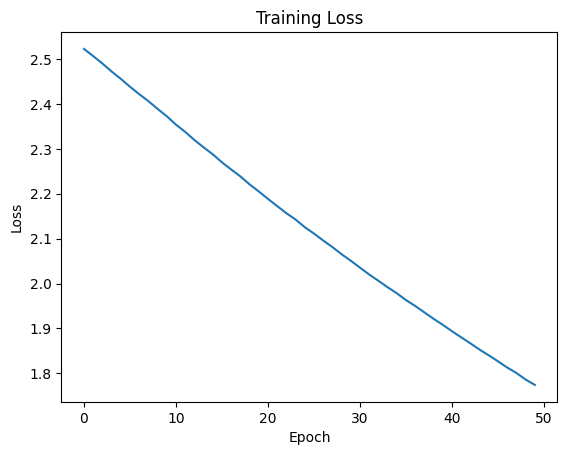

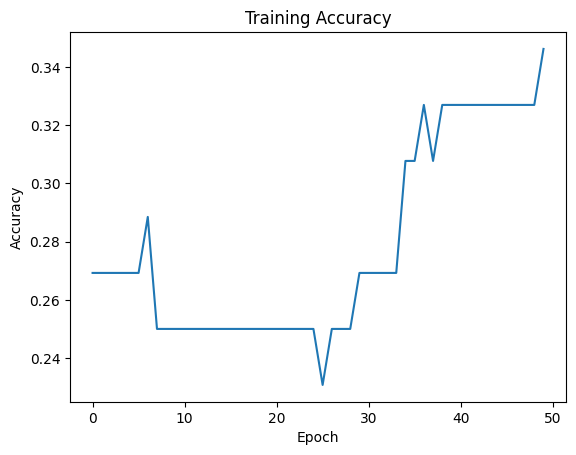

In [7]:
import matplotlib.pyplot as plt

# Fit the model and get the training history
history = hospbot.fit(training_data_tfidf, training_data_tags_dummy_encoded, epochs=50, batch_size=32)

# Visualize the training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Visualize the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


In [8]:
#import modules
import numpy as np
from tensorflow.keras.models import load_model
import json
import random

#importing training data
training_data= pd.read_csv("/content/chatbotDnn.txt", delimiter='|')

#loading model
chatbot= load_model("HospBot")

# Fill in any empty values in the first column with the default value "None"
training_data['patterns'] = training_data['patterns'].fillna('None')

In [9]:
#responses
responses= json.load(open("/content/intents.json"))

**EDA**

In [ ]:
responses

{'intents': [{'tag': 'greeting',
   'patterns': ['Hi there',
    'How are you',
    'Is anyone there?',
    'Hey',
    'Hola',
    'Hello',
    'Good day'],
   'responses': ['Hello, thanks for asking',
    'Good to see you again',
    'Hi there, how can I help?'],
   'context': ['']},
  {'tag': 'goodbye',
   'patterns': ['Bye',
    'See you later',
    'Goodbye',
    'Nice chatting to you, bye',
    'Till next time'],
   'responses': ['See you!', 'Have a nice day', 'Bye! Come back again soon.'],
   'context': ['']},
  {'tag': 'thanks',
   'patterns': ['Thanks',
    'Thank you',
    "That's helpful",
    'Awesome, thanks',
    'Thanks for helping me'],
   'responses': ['Happy to help!', 'Any time!', 'My pleasure'],
   'context': ['']},
  {'tag': 'noanswer',
   'patterns': [],
   'responses': ["Sorry, can't understand you",
    'Please give me more info',
    'Not sure I understand'],
   'context': ['']},
  {'tag': 'options',
   'patterns': ['How you could help me?',
    'What you can do

Transformed the json file into a dataframe.

In [ ]:
df = pd.json_normalize(responses, 'intents', errors='ignore')
df

,tag,patterns,responses,context
0,greeting,"[Hi there, How are you, Is anyone there?, Hey,...","[Hello, thanks for asking, Good to see you aga...",[]
1,goodbye,"[Bye, See you later, Goodbye, Nice chatting to...","[See you!, Have a nice day, Bye! Come back aga...",[]
2,thanks,"[Thanks, Thank you, That's helpful, Awesome, t...","[Happy to help!, Any time!, My pleasure]",[]
3,noanswer,[],"[Sorry, can't understand you, Please give me m...",[]
4,options,"[How you could help me?, What you can do?, Wha...",[I can guide you through Adverse drug reaction...,[]
5,adverse_drug,"[How to check Adverse drug reaction?, Open adv...",[Navigating to Adverse drug reaction module],[]
6,blood_pressure,"[Open blood pressure module, Task related to b...",[Navigating to Blood Pressure module],[]
7,blood_pressure_search,[I want to search for blood pressure result hi...,"[Please provide Patient ID, Patient ID?]",[search_blood_pressure_by_patient_id]
8,search_blood_pressure_by_patient_id,[],[Loading Blood pressure result for Patient],[]
9,pharmacy_search,"[Find me a pharmacy, Find pharmacy, List of ph...",[Please provide pharmacy name],[search_pharmacy_by_name]


In [ ]:
#Prints the column name that has empty list [] in it and the amount of values that has [].
lists=[]
names=[]
for column in df.columns:
    empty_list_count = 0
    for value in df[column]:
      if value == []:
        empty_list_count += 1
      elif isinstance(value, list) and len(value) == 0:
        empty_list_count += 1
    if empty_list_count > 0:
      lists.append(empty_list_count)
      empty_list_count= 0
      names.append(column)
for i in (range(len(names))):
  print(f"Column name: {names[i]}")
  print(f"Empty list count: {lists[i]}")


Column name: patterns
Empty list count: 5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tag        14 non-null     object
 1   patterns   14 non-null     object
 2   responses  14 non-null     object
 3   context    14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [ ]:
df.shape

(14, 4)

In [10]:
# fitting TfIdfVectorizer with training data to preprocess inputs
#The purpose of lowercasing is often to ensure consistency and improve the performance of text-based operations.
training_data["patterns"] = training_data["patterns"].str.lower()
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words="english")
vectorizer.fit(training_data["patterns"])

TfidfVectorizer(ngram_range=(1, 2), stop_words='english')

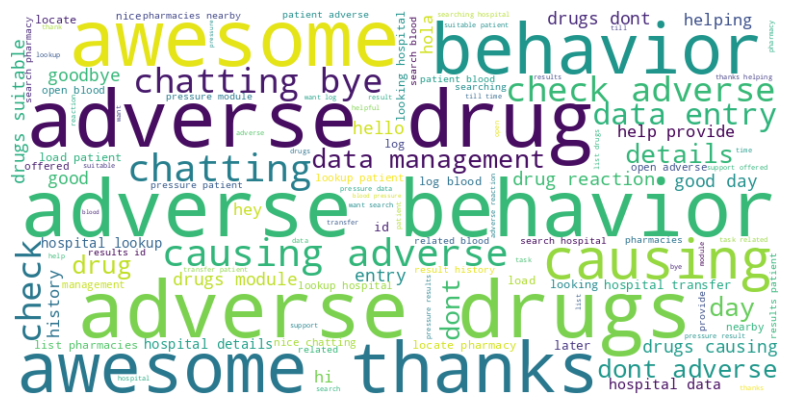

In [11]:
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary with words and their corresponding TF-IDF values
word_tfidf = dict(zip(feature_names, vectorizer.idf_))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_tfidf)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


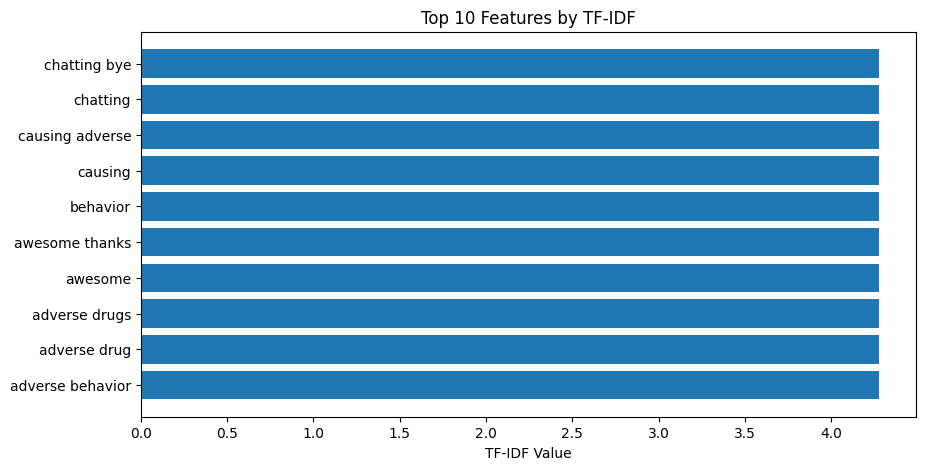

In [12]:
import pandas as pd
# Sort features by their TF-IDF values
sorted_features = sorted(zip(feature_names, vectorizer.idf_), key=lambda x: x[1], reverse=True)

# Get the top N features and their TF-IDF values
top_n = 10
top_features, top_tfidf = zip(*sorted_features[:top_n])

# Plot a bar chart
plt.figure(figsize=(10, 5))
plt.barh(range(len(top_features)), top_tfidf, align='center')
plt.yticks(np.arange(len(top_features)), top_features)
plt.xlabel('TF-IDF Value')
plt.title(f'Top {top_n} Features by TF-IDF')
plt.show()

In [13]:
# fitting LabelEncoder with target variable(tags) for inverse transformation of predictions
le = LabelEncoder()
le.fit(training_data["tags"])

LabelEncoder()

In [18]:
# transforming input and predicting intent
def predict_tag(inp_str):
    inp_data_tfidf = vectorizer.transform([inp_str.lower()]).toarray()
    #Prediction using the Neural Network Model
    predicted_proba = chatbot.predict(inp_data_tfidf)
    #Decoding Predictions
    encoded_label = [np.argmax(predicted_proba)]
    predicted_tag = le.inverse_transform(encoded_label)[0]
    #Stripping Whitespace
    predicted_tag = predicted_tag.strip()
    return predicted_tag

In [ ]:
predict_tag("Hi")

1/1 [==============================] - 0s 103ms/step


'greeting'

In [19]:
# Create a dictionary to store the tags and the corresponding responses
responses_by_tag = {}
for intent in responses['intents']:
  # Access the tag key to get the tag name
  tag = intent["tag"]
  # Access the responses key to get the list of responses for the tag
  resp = intent["responses"]
  # Add the tag and the corresponding responses to the dictionary
  responses_by_tag[tag] = resp


In [ ]:
responses_by_tag['greeting']

['Hello, thanks for asking',
 'Good to see you again',
 'Hi there, how can I help?']

In [16]:
#defining chat function
def chat():
  print("_______________________________________________________")
  print("|                    Hospital Chatbot                  |")
  print("|                                                      |")
  print("|                                                      |")
  print("| How may I be of assistance?                          |")
  print("| Type EXIT to quit                                    |")
  print("|______________________________________________________|")
  while True:
        inp = input("Ask anything... : ")
        if inp == "EXIT":
            break
        else:
            if inp:
              tag = predict_tag(inp)
              response = random.choice(responses_by_tag[tag])
              print("Response... : ", response)
            else:
                pass
# calling chat function to start chatting
chat()

_______________________________________________________
|                    Hospital Chatbot                  |
|                                                      |
|                                                      |
| How may I be of assistance?                          |
| Type EXIT to quit                                    |
|______________________________________________________|
Ask anything... : Hi there
1/1 [==============================] - 0s 108ms/step
Response... :  Hi there, how can I help?
Ask anything... : How you could help me?
1/1 [==============================] - 0s 90ms/step
Response... :  I can guide you through Adverse drug reaction list, Blood pressure tracking, Hospitals and Pharmacies
Ask anything... : How to check Adverse drug reaction?
1/1 [==============================] - 0s 21ms/step
Response... :  Please provide pharmacy name
Ask anything... : Fontana Pharmacy
1/1 [==============================] - 0s 22ms/step
Response... :  Please provide phar